# Plot OSU - GPU data - the ExaBench setup

- `osu_bw`
- `osu_bibw`
- `osu_latency`
- result summary:
    - no significant difference between JWB and JRDC results
    - best combination: OMPI; GPU 0 - 2; for all benchmarks
    - OMP much better than PSMPI for small msg sizes
    - GPU combination 0-2 in general better than 0-1 and 0-3

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

date = '3nov2022'

fname = ['/p/project/jscbenchmark/breuer1/osu-micro-benchmarks/benchmark/data/osu-6_2/osu_jwb_psmpi_s23.csv',
         '/p/project/jscbenchmark/breuer1/osu-micro-benchmarks/benchmark/data/osu-6_2/osu_jwb_ompi_s23.csv',
         '/p/project/jscbenchmark/breuer1/osu-micro-benchmarks/benchmark/data/osu-6_2/osu_jrdc_psmpi_s23.csv',
         '/p/project/jscbenchmark/breuer1/osu-micro-benchmarks/benchmark/data/osu-6_2/osu_jrdc_ompi_s23.csv']

#if system == 'jw':
#    ib_tech = 'EDR'
#    ib_max = (100/8)*(64/66)*1000
#elif system == 'JRDC':
#    ib_tech = 'HDR100'
#    ib_max = (100/8)*(64/66)*1000
#elif system == 'jwb':
#    ib_tech = 'HDR200'
#    ib_max = (100/8)*(64/66)*1000
#else:
#    print('no IB value available!!')

In [2]:
bench_data = pd.DataFrame()
for i, filename in enumerate(fname):
    print(i, filename)
    bench_data = bench_data.append(pd.read_csv(filename))
bench_data.rename(columns={'execute_mode': 'mpi'}, inplace=True)
bench_data['mpi_dev'] = bench_data.system + '_' + bench_data.mpi + '_' + bench_data.cuda_dev
bench_data = bench_data.reset_index(drop=True)

0 /p/project/jscbenchmark/breuer1/osu-micro-benchmarks/benchmark/data/osu-6_2/osu_jwb_psmpi_s23.csv
1 /p/project/jscbenchmark/breuer1/osu-micro-benchmarks/benchmark/data/osu-6_2/osu_jwb_ompi_s23.csv
2 /p/project/jscbenchmark/breuer1/osu-micro-benchmarks/benchmark/data/osu-6_2/osu_jrdc_psmpi_s23.csv
3 /p/project/jscbenchmark/breuer1/osu-micro-benchmarks/benchmark/data/osu-6_2/osu_jrdc_ompi_s23.csv


In [3]:
bench_data

,system,mpi,nodes,taskspernode,cuda_dev,osu_exe,msg_size,buffer,target,runtime[sec],size,result,job_id,status,exit_code,mpi_dev
0,JWB,psmpi,1,2,0;1,osu_bibw,1,cuda,D D,2.71,1,0.58,6259580,COMPLETED,0:0,JWB_psmpi_0;1
1,JWB,psmpi,1,2,0;2,osu_bibw,1,cuda,D D,2.70,1,0.64,6259592,COMPLETED,0:0,JWB_psmpi_0;2
2,JWB,psmpi,1,2,0;3,osu_bibw,1,cuda,D D,2.52,1,0.54,6259603,COMPLETED,0:0,JWB_psmpi_0;3
3,JWB,psmpi,1,2,0;1,osu_bibw,16,cuda,D D,2.69,16,9.23,6259581,COMPLETED,0:0,JWB_psmpi_0;1
4,JWB,psmpi,1,2,0;2,osu_bibw,16,cuda,D D,2.77,16,10.11,6259593,COMPLETED,0:0,JWB_psmpi_0;2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,JRDC,ompi,2,1,1,osu_bw,67108864,cuda,D D,8.78,67108864,24543.10,11039150,COMPLETED,0:0,JRDC_ompi_1
172,JRDC,ompi,1,2,0;1,osu_latency,0,cuda,D D,1.63,0,0.62,11039143,COMPLETED,0:0,JRDC_ompi_0;1
173,JRDC,ompi,1,2,0;2,osu_latency,0,cuda,D D,1.65,0,0.36,11039144,COMPLETED,0:0,JRDC_ompi_0;2
174,JRDC,ompi,1,2,0;3,osu_latency,0,cuda,D D,1.58,0,0.61,11039145,COMPLETED,0:0,JRDC_ompi_0;3


In [4]:
bench_data.columns.values

array(['system', 'mpi', 'nodes', 'taskspernode', 'cuda_dev', 'osu_exe',
       'msg_size', 'buffer', 'target', 'runtime[sec]', 'size', 'result',
       'job_id', 'status', 'exit_code', 'mpi_dev'], dtype=object)

In [5]:
#bench_data.head

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def p2p_plot_norm(bench_data, p2p_func, y_val, norm_val, nodes):
    """ 
       bench_data: whole dataset
       p2p_func: p2p OSU benchmark name
       y_val: value to plot
       norm_val: value of column `mpi_dev` used for normalization
       nodes: either 1 or 2 to select between intra- oder inter-node results
    """
    p2p = bench_data.loc[bench_data["osu_exe"] == p2p_func].loc[bench_data["nodes"] == nodes].reset_index(drop=True)
    p2p_pivot = p2p.pivot_table(index="size", columns="mpi_dev", values=[y_val])
    #display(p2p_pivot)
    # normalize with respect to norm_val
    p2p_pivot_norm = p2p_pivot[p2p_pivot.columns].div(p2p_pivot[(y_val, norm_val)], axis=0)
    display(p2p_pivot,p2p_pivot_norm)
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20, 8), linewidth=4, edgecolor="k")
    fig.subplots_adjust(wspace=0.2)

    p2p_pivot.plot(kind='line', y=y_val, 
                   title="{} {}; nodes: {}; tpn: {}".format(p2p["system"][0], p2p["osu_exe"][0], p2p["nodes"][0], p2p["taskspernode"][0]),
                   marker='o', logy=True, grid=True, ax=ax0)
    p2p_pivot_norm.plot(kind='line', y=y_val, 
                        title="NORM: {} {}; nodes: {}; tpn: {}".format(p2p["system"][0], p2p["osu_exe"][0], p2p["nodes"][0], p2p["taskspernode"][0]),
                        marker='o', grid=True, ax=ax1)
    import matplotlib as mpl
    valid_markers = mpl.markers.MarkerStyle.filled_markers
    markers = [mark if mark != '8' else 'd' for mark in valid_markers[:p2p_pivot_norm.shape[1]]]
    for i, (line0, line1) in enumerate(zip(ax0.get_lines(), ax1.get_lines())):
        line0.set_marker(markers[i])
        line1.set_marker(markers[i])
    for id in [0,1]:
        eval("ax{}".format(id)).set_ylabel('{}'.format('Bandwidth (MB/s)'))
        eval("ax{}".format(id)).set_xscale('symlog', base=2)
        eval("ax{}".format(id)).set_xlim(0)
        eval("ax{}".format(id)).legend()
    plt.ioff()

# plot p2p - one node

osu_bw


result                                             \
mpi_dev  JRDC_ompi_0;1 JRDC_ompi_0;2 JRDC_ompi_0;3 JRDC_psmpi_0;1   
size                                                                
1                 0.48          0.53          0.48           0.39   
16                7.70          8.61          7.79           6.39   
1048576       69541.34      69076.72      68497.48       68766.50   
4194304       87131.27      87113.09      86010.12       86761.42   
67108864      93543.53      93482.77      93529.54       93513.90   

                                                                               \
mpi_dev  JRDC_psmpi_0;2 JRDC_psmpi_0;3 JWB_ompi_0;1 JWB_ompi_0;2 JWB_ompi_0;3   
size                                                                            
1                  0.45           0.38         0.47         0.53         0.48   
16                 7.36           6.48         7.69         8.47         7.70   
1048576        67892.08       68439.24     69532.37     67926.38     69053.13   
4194304        85585.01       85582.39     86128.58     85767.42     86165.42   
67108864       93475.09       93535.80     93533.15     93460.03     93558.82   

                                                    
mpi_dev  JWB_psmpi_0;1 JWB_psmpi_0;2 JWB_psmpi_0;3  
size                                                
1                 0.40          0.40          0.40  
16                6.30          7.23          6.37  
1048576       68906.53      68237.00      68803.80  
4194304       85938.08      85486.46      86049.90  
67108864      93510.43      93469.86      93521.90

result                                             \
mpi_dev  JRDC_ompi_0;1 JRDC_ompi_0;2 JRDC_ompi_0;3 JRDC_psmpi_0;1   
size                                                                
1             1.200000      1.325000      1.200000       0.975000   
16            1.222222      1.366667      1.236508       1.014286   
1048576       1.009213      1.002470      0.994064       0.997968   
4194304       1.013884      1.013673      1.000838       1.009581   
67108864      1.000354      0.999704      1.000204       1.000037   

                                                                               \
mpi_dev  JRDC_psmpi_0;2 JRDC_psmpi_0;3 JWB_ompi_0;1 JWB_ompi_0;2 JWB_ompi_0;3   
size                                                                            
1              1.125000       0.950000     1.175000     1.325000     1.200000   
16             1.168254       1.028571     1.220635     1.344444     1.222222   
1048576        0.985278       0.993218     1.009082     0.985776     1.002128   
4194304        0.995892       0.995861     1.002217     0.998014     1.002645   
67108864       0.999622       1.000271     1.000243     0.999461     1.000517   

                                                    
mpi_dev  JWB_psmpi_0;1 JWB_psmpi_0;2 JWB_psmpi_0;3  
size                                                
1                  1.0      1.000000      1.000000  
16                 1.0      1.147619      1.011111  
1048576            1.0      0.990284      0.998509  
4194304            1.0      0.994745      1.001301  
67108864           1.0      0.999566      1.000123

osu_bibw


result                                             \
mpi_dev  JRDC_ompi_0;1 JRDC_ompi_0;2 JRDC_ompi_0;3 JRDC_psmpi_0;1   
size                                                                
1                 0.70          0.79          0.70           0.58   
16               11.21         12.58         11.20           9.16   
1048576      127576.35     127359.37     126425.26      130644.31   
4194304      159864.41     159530.06     161253.79      163590.47   
67108864     176596.59     176616.95     176658.06      176724.59   

                                                                               \
mpi_dev  JRDC_psmpi_0;2 JRDC_psmpi_0;3 JWB_ompi_0;1 JWB_ompi_0;2 JWB_ompi_0;3   
size                                                                            
1                  0.64           0.57         0.70         0.79         0.70   
16                10.30           9.30        11.26        12.56        11.18   
1048576       130795.24      121682.93    125610.38    126240.99    122708.75   
4194304       161461.45      162310.00    159197.55    159528.42    159659.81   
67108864      176712.44      176738.22    176514.30    176533.53    176561.41   

                                                    
mpi_dev  JWB_psmpi_0;1 JWB_psmpi_0;2 JWB_psmpi_0;3  
size                                                
1                 0.58          0.64          0.54  
16                9.23         10.11          9.04  
1048576      131203.92     130283.69     129730.00  
4194304      161270.48     160887.28     161304.90  
67108864     176667.63     176676.10     176664.84

result                                             \
mpi_dev  JRDC_ompi_0;1 JRDC_ompi_0;2 JRDC_ompi_0;3 JRDC_psmpi_0;1   
size                                                                
1             1.206897      1.362069      1.206897       1.000000   
16            1.214518      1.362947      1.213434       0.992416   
1048576       0.972352      0.970698      0.963578       0.995735   
4194304       0.991281      0.989208      0.999897       1.014386   
67108864      0.999598      0.999713      0.999946       1.000322   

                                                                               \
mpi_dev  JRDC_psmpi_0;2 JRDC_psmpi_0;3 JWB_ompi_0;1 JWB_ompi_0;2 JWB_ompi_0;3   
size                                                                            
1              1.103448       0.982759     1.206897     1.362069     1.206897   
16             1.115926       1.007584     1.219935     1.360780     1.211268   
1048576        0.996885       0.927434     0.957368     0.962174     0.935252   
4194304        1.001184       1.006446     0.987146     0.989198     0.990013   
67108864       1.000254       1.000400     0.999132     0.999241     0.999399   

                                                    
mpi_dev  JWB_psmpi_0;1 JWB_psmpi_0;2 JWB_psmpi_0;3  
size                                                
1                  1.0      1.103448      0.931034  
16                 1.0      1.095341      0.979415  
1048576            1.0      0.992986      0.988766  
4194304            1.0      0.997624      1.000213  
67108864           1.0      1.000048      0.999984

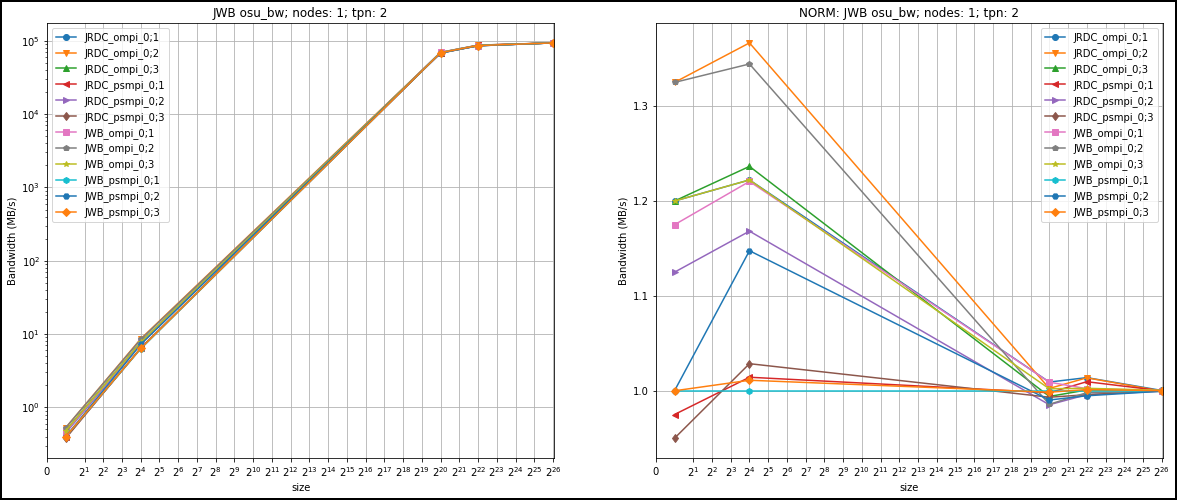

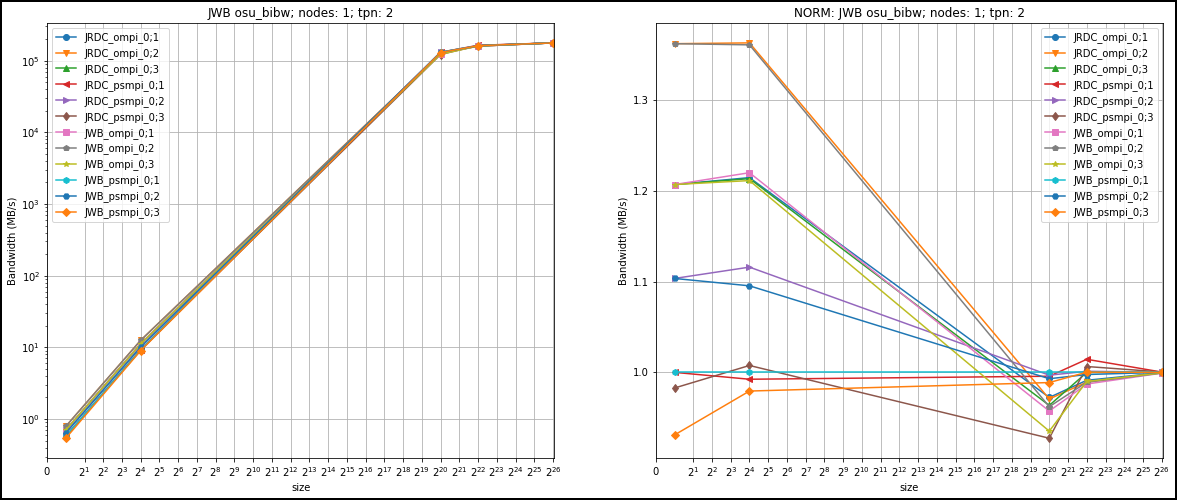

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

for p2p in ["osu_bw", "osu_bibw"]:
    if p2p in bench_data["osu_exe"].unique():
        print(p2p)
        if p2p in ["osu_bw", "osu_bibw"]:
            p2p_plot_norm(bench_data, p2p, 'result', 'JWB_psmpi_0;1', 1)
    else:
        print('{}: no data available :/'.format(p2p))

# plot p2p - two nodes

osu_bw


result                                    
mpi_dev  JRDC_ompi_1 JRDC_psmpi_1 JWB_ompi_1 JWB_psmpi_1
size                                                    
1               1.57         0.87       1.56        0.86
16             25.20        13.75      24.78       13.45
1048576     24589.97     24487.65   24554.10    24511.52
4194304     24656.88     24631.80   24628.51    24628.11
67108864    24543.10     24537.39   24545.74    24481.90

result                                    
mpi_dev  JRDC_ompi_1 JRDC_psmpi_1 JWB_ompi_1 JWB_psmpi_1
size                                                    
1           1.825581     1.011628   1.813953         1.0
16          1.873606     1.022305   1.842379         1.0
1048576     1.003201     0.999026   1.001737         1.0
4194304     1.001168     1.000150   1.000016         1.0
67108864    1.002500     1.002267   1.002608         1.0

osu_bibw


result                                    
mpi_dev  JRDC_ompi_1 JRDC_psmpi_1 JWB_ompi_1 JWB_psmpi_1
size                                                    
1               1.78         0.98       1.78        0.97
16             28.43        15.57      28.16       15.83
1048576     34413.90     34326.93   34391.24    34622.94
4194304     47941.82     35220.36   34131.87    35032.02
67108864    34746.31     36707.76   34554.44    36589.88

result                                    
mpi_dev  JRDC_ompi_1 JRDC_psmpi_1 JWB_ompi_1 JWB_psmpi_1
size                                                    
1           1.835052     1.010309   1.835052         1.0
16          1.795957     0.983575   1.778901         1.0
1048576     0.993962     0.991450   0.993308         1.0
4194304     1.368514     1.005376   0.974305         1.0
67108864    0.949615     1.003222   0.944372         1.0

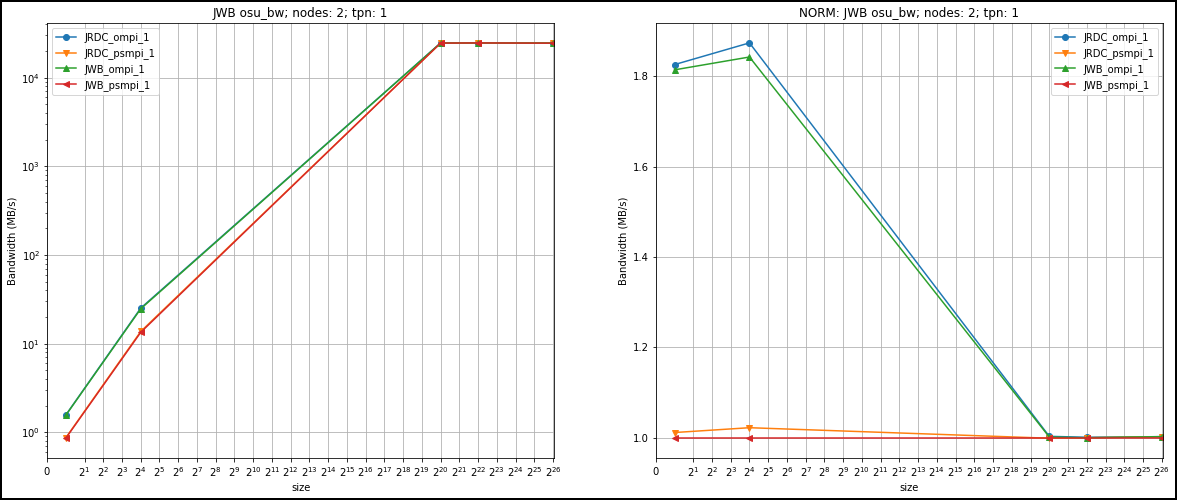

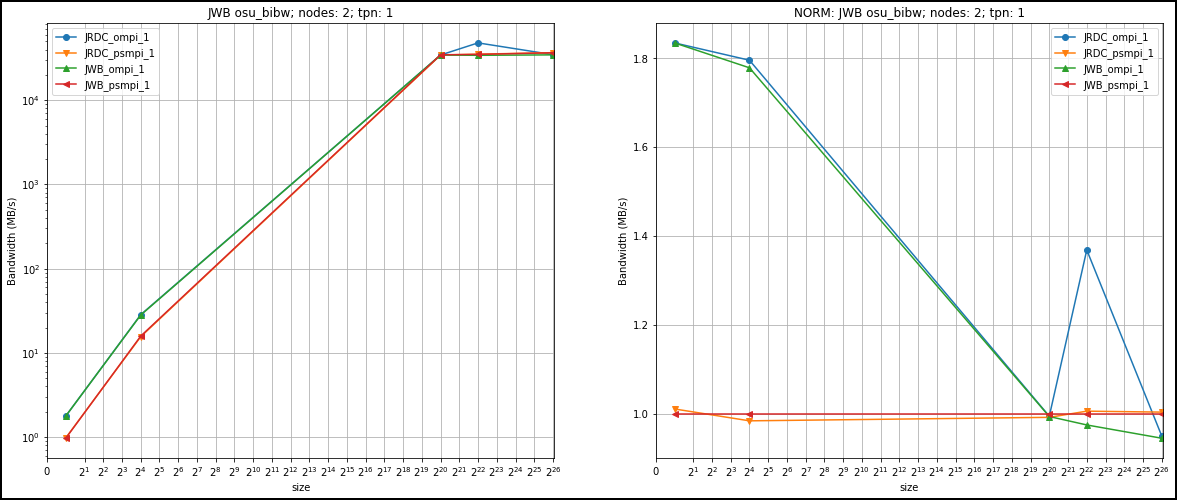

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

for p2p in ["osu_bw", "osu_bibw"]:
    if p2p in bench_data["osu_exe"].unique():
        print(p2p)
        if p2p in ["osu_bw", "osu_bibw"]:
            p2p_plot_norm(bench_data, p2p, 'result', 'JWB_psmpi_1', 2)
    else:
        print('{}: no data available :/'.format(p2p))

# Plot latency - one node

,system,mpi,nodes,taskspernode,cuda_dev,osu_exe,msg_size,buffer,target,runtime[sec],size,result,job_id,status,exit_code,mpi_dev
0,JWB,psmpi,1,2,0;1,osu_latency,0,cuda,D D,2.68,0,0.95,6259586,COMPLETED,0:0,JWB_psmpi_0;1
1,JWB,psmpi,1,2,0;2,osu_latency,0,cuda,D D,2.69,0,0.69,6259597,COMPLETED,0:0,JWB_psmpi_0;2
2,JWB,psmpi,1,2,0;3,osu_latency,0,cuda,D D,2.71,0,0.94,6259610,COMPLETED,0:0,JWB_psmpi_0;3
3,JWB,ompi,1,2,0;1,osu_latency,0,cuda,D D,1.86,0,0.61,6259698,COMPLETED,0:0,JWB_ompi_0;1
4,JWB,ompi,1,2,0;2,osu_latency,0,cuda,D D,1.83,0,0.36,6259699,COMPLETED,0:0,JWB_ompi_0;2
5,JWB,ompi,1,2,0;3,osu_latency,0,cuda,D D,1.72,0,0.61,6259700,COMPLETED,0:0,JWB_ompi_0;3
6,JRDC,psmpi,1,2,0;1,osu_latency,0,cuda,D D,2.28,0,0.95,11039183,COMPLETED,0:0,JRDC_psmpi_0;1
7,JRDC,psmpi,1,2,0;2,osu_latency,0,cuda,D D,2.22,0,0.69,11039194,COMPLETED,0:0,JRDC_psmpi_0;2
8,JRDC,psmpi,1,2,0;3,osu_latency,0,cuda,D D,2.17,0,0.94,11039205,COMPLETED,0:0,JRDC_psmpi_0;3
9,JRDC,ompi,1,2,0;1,osu_latency,0,cuda,D D,1.63,0,0.62,11039143,COMPLETED,0:0,JRDC_ompi_0;1


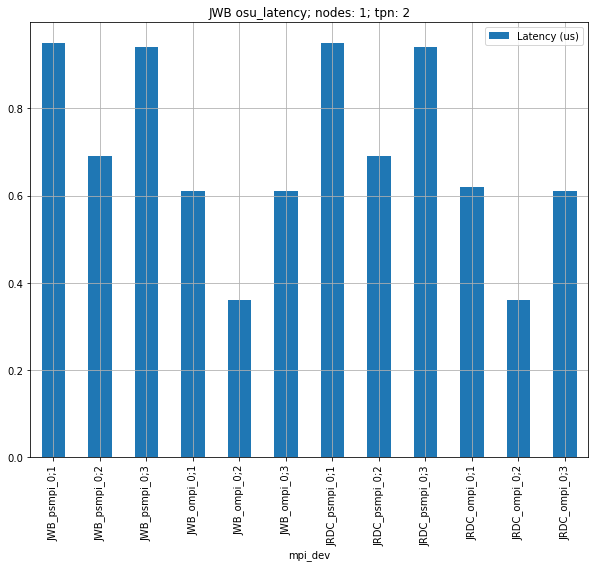

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

if "osu_latency" in bench_data["osu_exe"].unique():
    lat = bench_data.loc[bench_data["osu_exe"] == "osu_latency"].loc[bench_data["nodes"] == 1].reset_index(drop=True)
    display(lat)
    fig, ax = plt.subplots(figsize=(10, 8))
    lat.plot(kind='bar', x="mpi_dev", y=["result"],
             title="{} {}; nodes: {}; tpn: {}".format(lat["system"][0], lat["osu_exe"][0], lat["nodes"][0], lat["taskspernode"][0]), 
             grid=True, ax=ax);
    #ax.set_ylabel('Latency (us)')
    ax.legend(['Latency (us)'])
else:
    print("no osu_latency found!!")

# Plot latency - two nodes

,system,mpi,nodes,taskspernode,cuda_dev,osu_exe,msg_size,buffer,target,runtime[sec],size,result,job_id,status,exit_code,mpi_dev
0,JWB,psmpi,2,1,1,osu_latency,0,cuda,D D,2.36,0,2.18,6259623,COMPLETED,0:0,JWB_psmpi_1
1,JWB,ompi,2,1,1,osu_latency,0,cuda,D D,2.12,0,1.80,6259711,COMPLETED,0:0,JWB_ompi_1
2,JRDC,psmpi,2,1,1,osu_latency,0,cuda,D D,0.99,0,2.15,11039216,COMPLETED,0:0,JRDC_psmpi_1
3,JRDC,ompi,2,1,1,osu_latency,0,cuda,D D,1.02,0,1.79,11039157,COMPLETED,0:0,JRDC_ompi_1


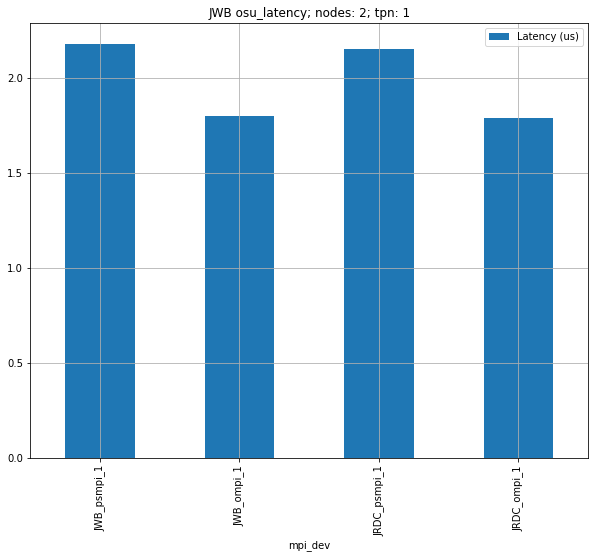

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

if "osu_latency" in bench_data["osu_exe"].unique():
    lat = bench_data.loc[bench_data["osu_exe"] == "osu_latency"].loc[bench_data["nodes"] == 2].reset_index(drop=True)
    display(lat)
    fig, ax = plt.subplots(figsize=(10, 8))
    lat.plot(kind='bar', x="mpi_dev", y=["result"],
             title="{} {}; nodes: {}; tpn: {}".format(lat["system"][0], lat["osu_exe"][0], lat["nodes"][0], lat["taskspernode"][0]), 
             grid=True, ax=ax);
    #ax.set_ylabel('Latency (us)')
    ax.legend(['Latency (us)'])
else:
    print("no osu_latency found!!")